In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('steps_accel.csv')
df.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.049199,0.984742,-1.134125,-2.770782,3.151696
1,0.054199,1.007727,-1.179482,-2.742980,3.151290
2,0.059143,1.117693,-1.141112,-2.773646,3.200701
3,0.064083,1.284987,-1.082502,-2.827566,3.289093
4,0.069023,1.290573,-0.979780,-2.658208,3.113136


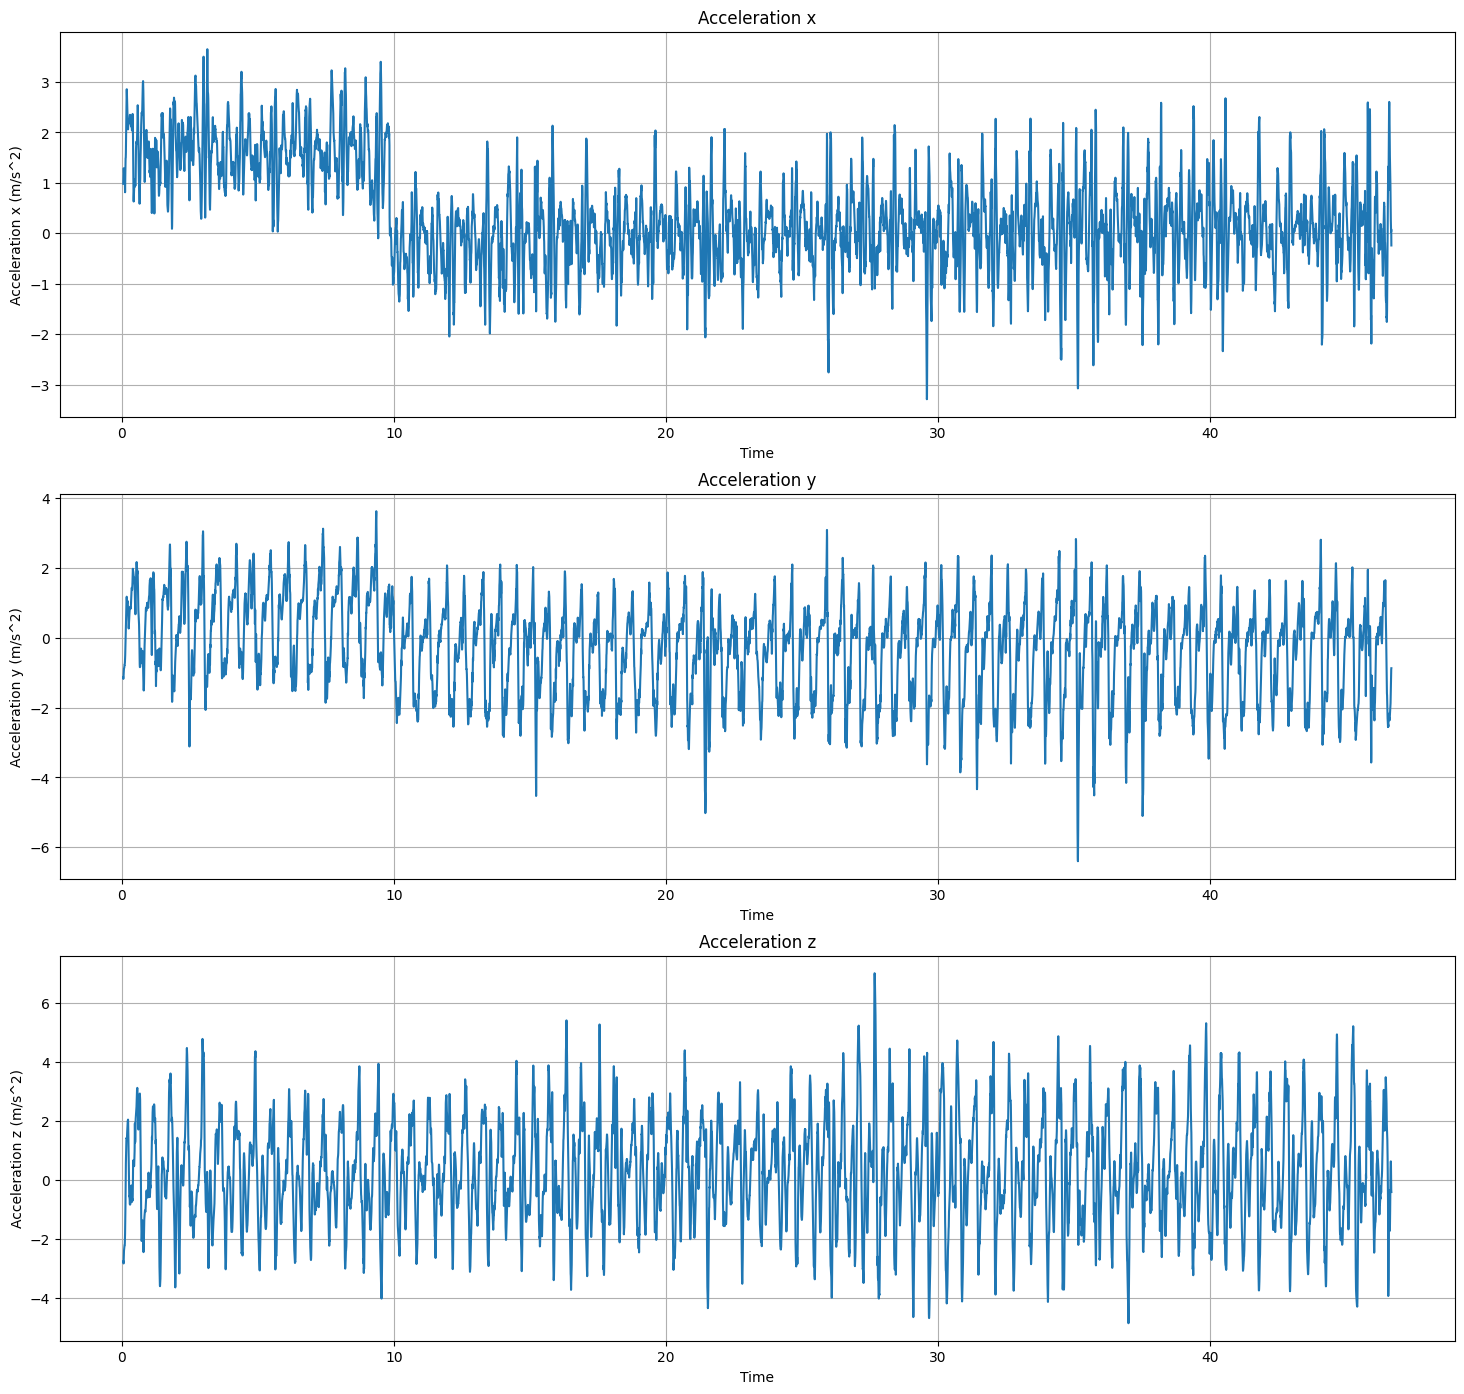

In [6]:
plt.figure(figsize=(18, 17))

plt.subplot(3, 1, 1)
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'])
plt.grid()
plt.title('Acceleration x')
plt.xlabel('Time')
plt.ylabel('Acceleration x (m/s^2)')
#plt.axis([0, 10, -30, 30])
plt.subplot(3, 1, 2)
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'])
plt.grid()
plt.title('Acceleration y')
plt.xlabel('Time')
plt.ylabel('Acceleration y (m/s^2)')
#plt.axis([0, 10, -30, 30])
plt.subplot(3, 1, 3)
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'])
plt.grid()
plt.title('Acceleration z')
plt.xlabel('Time')
plt.ylabel('Acceleration z (m/s^2)')
#plt.axis([0, 10, -30, 30])

plt.show()

In [7]:
#determine which component (x,y,z) best captured the acceleration of the steps
#calculate the sum of the linear acceleration
sum_x = df['Linear Acceleration x (m/s^2)'].abs().sum()
sum_y = df['Linear Acceleration y (m/s^2)'].abs().sum()
sum_z = df['Linear Acceleration z (m/s^2)'].abs().sum()

#print the sum of the linear acceleration
print('Sum of the linear acceleration x: ', sum_x)
print('Sum of the linear acceleration y: ', sum_y)
print('Sum of the linear acceleration z: ', sum_z)

Sum of the linear acceleration x:  7564.3611089417145
Sum of the linear acceleration y:  10050.167804054385
Sum of the linear acceleration z:  13644.001846267276


In [1]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    
    return y

Number of steps:  74.5


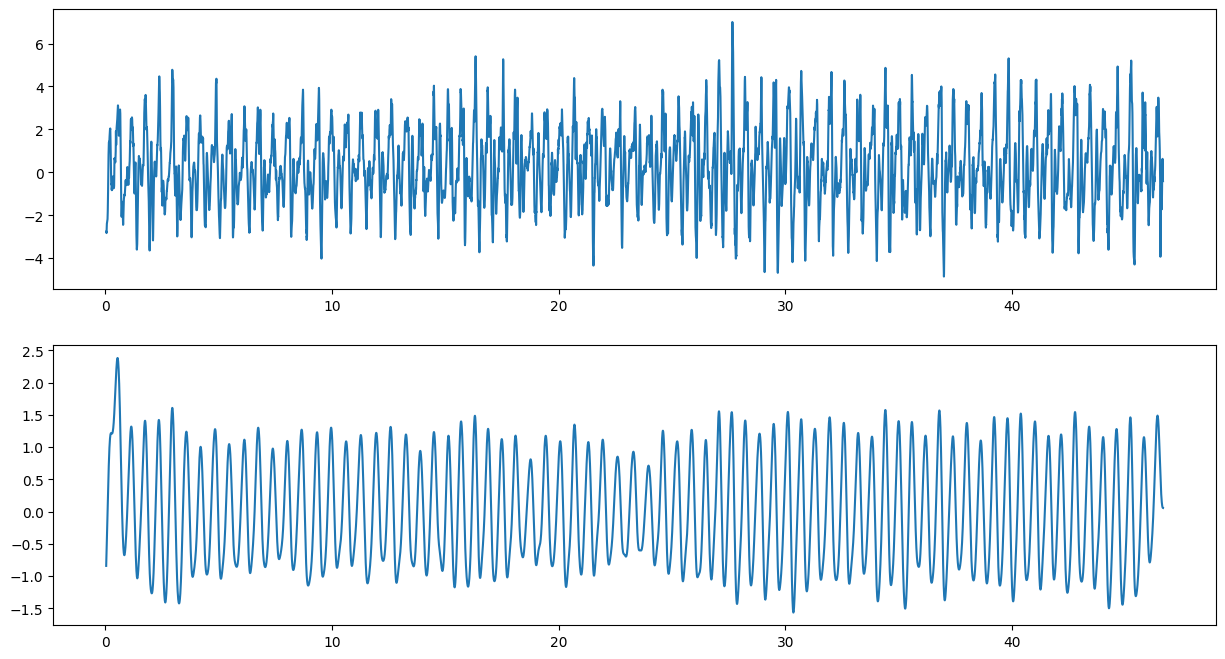

In [8]:
#filter the data
noisy_signal =df['Linear Acceleration z (m/s^2)']
time = df['Time (s)']
order = 2
dt = (time[len(time)-1]-time[0])/len(time)
fs = 1/dt
nyq = 0.5 * fs
cutoff_H = 1/5
cutoff_L = 1/0.5

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs, nyq, order)

plt.figure(figsize=(15, 8))
plt.subplot(2,1,1)
plt.plot(time, noisy_signal, label='Noisy Signal')
plt.subplot(2,1,2)
plt.plot(time, final_signal, label='Filtered Signal')
stepdata = final_signal
steps = 0

for i in range(stepdata.shape[0]-1):
    if stepdata[i]/stepdata[i+1]<0:
        steps += 0.5
print("Number of steps: ", steps)